#Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Image Processing with Python.

## Introduction to Python Imaging Library(PIL)

### Exercise - 1:
Complete all the Task.

 Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

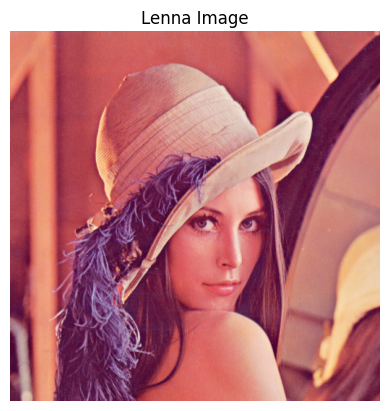

In [ ]:
#step 1: Read and display the image
image = Image.open("/content/drive/MyDrive/Worksheet _01 Images/Lenna_(test_image).png")
plt.imshow(image)
plt.title("Lenna Image")
plt.axis("off")
plt.show()

*2*. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and Array Indexing.



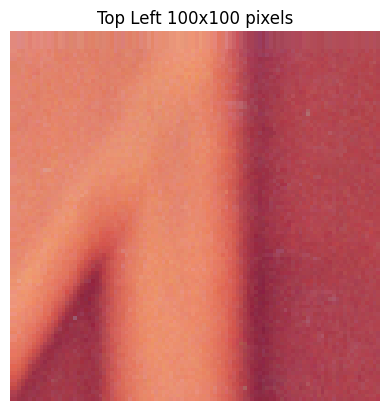

In [ ]:
#step 2: Display Only the top -left Corner(100x100 pixels)
image_array = np.array(image)
top_left  = image_array[:100, :100]
plt.imshow(top_left)
plt.title("Top Left 100x100 pixels")
plt.axis("off")
plt.show()

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

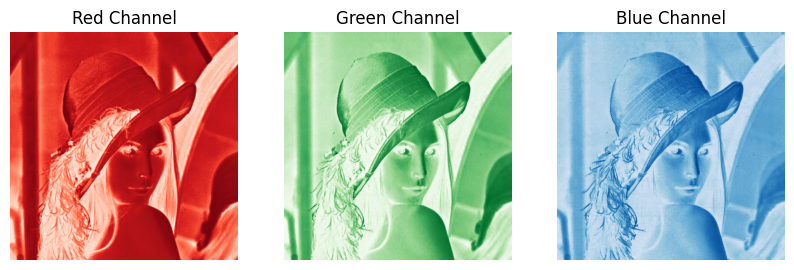

In [ ]:
from functools import reduce
#step 3 : Show the three color channels
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()


4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a light gray color), and then display the modified image.

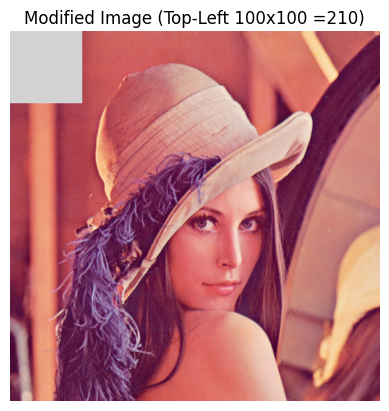

In [ ]:
#step4 : Modify the top 100x100 pixels to 210 (Gray)
image_array[:100, :100] = 210
plt.imshow(image_array)
plt.title("Modified Image (Top-Left 100x100 =210)")
plt.axis("off")
plt.show()

# Exercise - 2:

## Complete all the Task.

### 1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

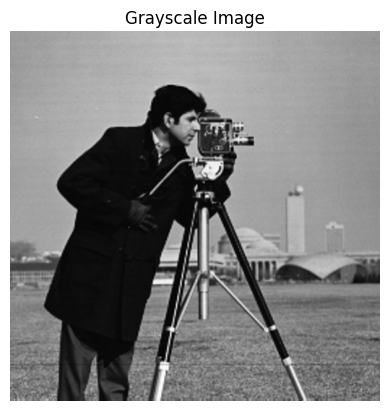

In [ ]:
#Step1 :Load and display a grayscale image
image = Image.open("/content/drive/MyDrive/Worksheet _01 Images/cameraman.png")
gray_image = image.convert("L")
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

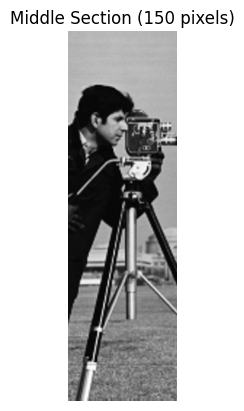

In [ ]:
#step2 :Extract and display the middle 150 pixels
gray_array = np.array(gray_image)
center_x = gray_array.shape[1]//2
middle_section = gray_array[:, center_x-75:center_x+75]
plt.imshow(middle_section, cmap='gray')
plt.title("Middle Section (150 pixels)")
plt.axis("off")
plt.show()


3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values above 100 to 255 (creating a binary image).

• Display the resulting binary image.

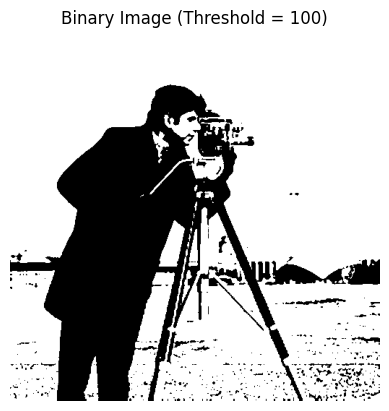

In [ ]:
#step3 : Apply a threshold
grayscale_threshold = np.where(gray_array< 100,0,225)
plt.imshow(grayscale_threshold, cmap='gray')
plt.title("Binary Image (Threshold = 100)")
plt.axis("off")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array.

• Display the rotated image using matplotlib.

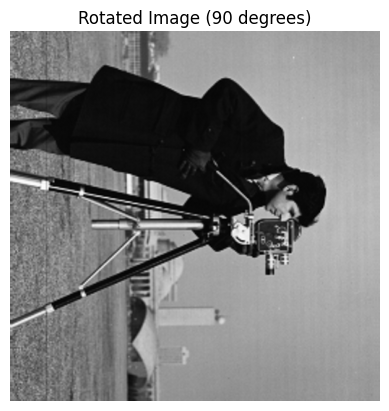

In [ ]:
#step4 :  Rotate the image 90 degrees clockwise
rotated_image = gray_image.rotate(-90)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (90 degrees)")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

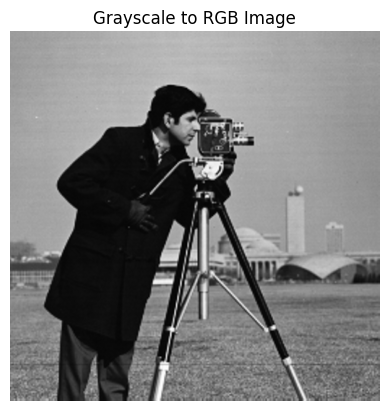

In [ ]:
#step5 :Convert grayscale image to RGB
rgb_image = np.stack([gray_array]*3, axis=-1)
plt.imshow(rgb_image)
plt.title("Grayscale to RGB Image")
plt.axis("off")
plt.show()

# Image Compression and Decompression

*   List item
*   List item

using PCA.

## 1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

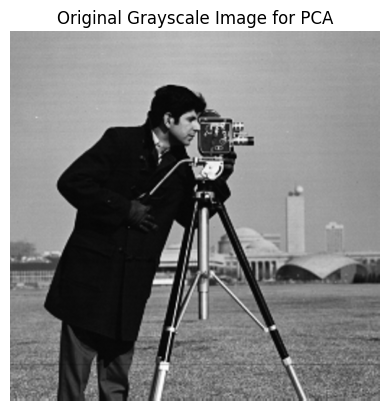

In [ ]:
def pca_compression(image_array, num_components):
  mean_centered = image_array - np.mean(image_array, axis=0)
  covariance_matrix = np.cov(mean_centered, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

  sorted_indices = np.argsort(eigenvalues)[::-1]
  top_eigenvectors = eigenvectors[:, sorted_indices[:num_components]]
  reduced_data = np.dot(mean_centered, top_eigenvectors)
  reconstructed = np.dot(reduced_data, top_eigenvectors.T) + np.mean(image_array, axis=0)

  return reconstructed

#Load and prepare data for PCA
pca_image = np.array(gray_image, dtype= np.float64)
plt.imshow(pca_image, cmap='gray')
plt.title("Original Grayscale Image for PCA")
plt.axis("off")
plt.show()

## 2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

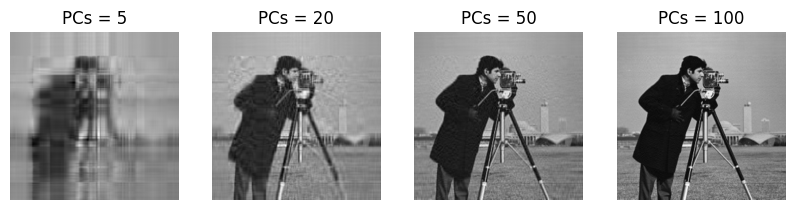

In [ ]:
#Expirenment With different numbers of principal componets
components =[5,20,50,100]
plt.figure(figsize=(10,5))
for i ,k in enumerate(components):
  reconstructed_img = pca_compression(pca_image, k)
  plt.subplot(1,4,i+1)
  plt.imshow(reconstructed_img, cmap='gray')
  plt.title(f"PCs = {k}")
  plt.axis("off")
plt.show()


## 3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


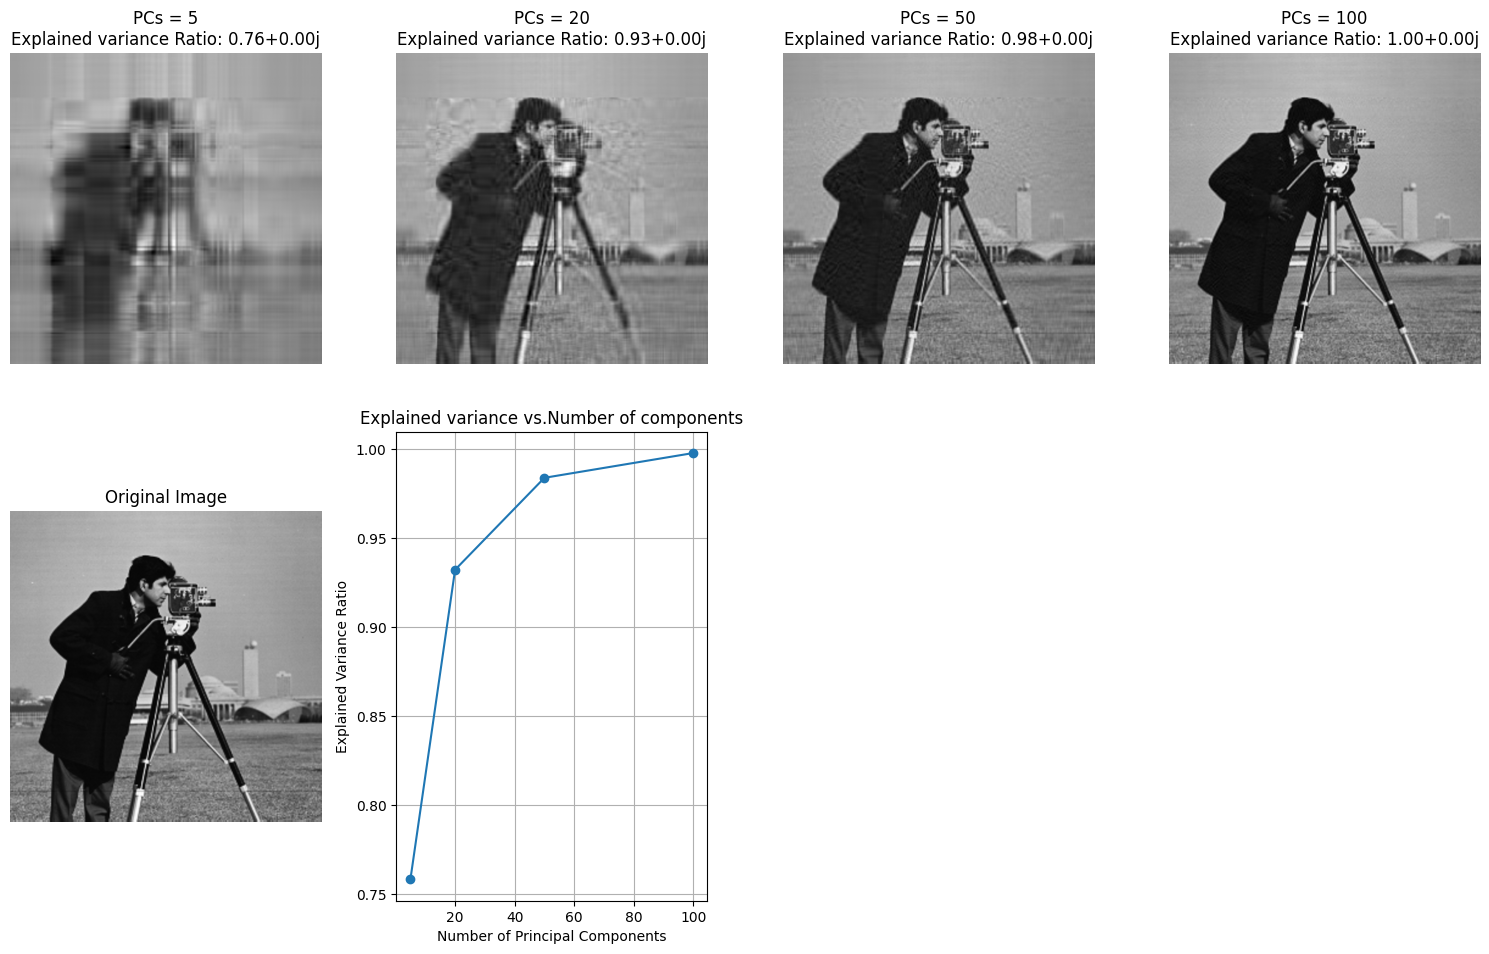

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

components = [5,20,50,100]
explained_variances= []#to store explained variance for each components

plt.figure(figsize=(15,10))
for i,k in enumerate(components):
  reconstructed_img = pca_compression(pca_image, k)
  explained_variance = np.sum(np.linalg.eigvals(np.cov(reconstructed_img, rowvar=False))[:k])/np.sum(np.linalg.eigvals(np.cov(pca_image, rowvar=False)))
  explained_variances.append(explained_variance)
  plt.subplot(2, 4,i+1)
  plt.imshow(reconstructed_img, cmap='gray')
  plt.title(f"PCs = {k}\nExplained variance Ratio: {explained_variance:.2f}")
  plt.axis("off")

#plot the original image
plt.subplot(2,4,5)
plt.imshow(pca_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")


#Explained variance plot
plt.subplot(2,4,6)
plt.plot(components, explained_variances, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained variance vs.Number of components")
plt.grid(True)

plt.tight_layout()
plt.show()




